# Numerical inversion of probability generating functions

In most cases of interest, the PGF $G(x)$ is known *indirectly*, i.e., we know how to compute its value for any $x$, but we do not know the underlying coefficients. 
For instance, the PGF for the result of a roll of two six-sided dices is $G(x) = g(x)^2$, where 

$$
g(x) = \sum_{n = 1}^6 \frac{1}{6} x^n
$$

is the PGF for the result of a roll of a single dice.
While in this example it is straightforward to evaluate the coefficients, in many applications, $G(x)$ is constructed by multiplying and composing multiple functions together.
In this chapter, we will look at a systematic approach to extract the distribution $(p_n)_{n = 0}^\infty$ from an arbitrary PGF $G(x)$.

## Polynomial generating functions

The [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)) of a random variable $Y$ is defined as

$$
\Phi(\omega) = \left \langle e^{i \omega Y} \right \rangle
$$

For a discrete random variable $n$ of PGF $G(x)$, we directly have $\Phi(\omega) = G(e^{i\omega})$.
There exists a one-to-one correspondence between the characteristic function and the cumulative distribution of the random variable.
Therefore, it is possible to recover the probability distribution from the characteristic function. 
For a discrete probability distribution, we need to evaluate the following Fourier integral

$$
p_n = \int_0^{2\pi} G(e^{i\omega}) e^{-i\omega n} \; \mathrm{d} \omega \;.
$$

To verify this is true, expand $G(e^{i\omega})$ in a power series inside the integral and to realize that only the $n$-th term contribute to the integral, all other terms are zero.
Moreover, if $G(x)$ is a polynomial of degree $N-1$, meaning $p_n = 0$ for all $n \geq N$, then the probability distribution is recovered exactly from a discrete Fourier transform

$$
p_n = \frac{1}{N} \sum_{m = 0}^{N-1} G(e^{2 \pi i m /N}) e^{2 \pi i n m /N} \;.
$$

Again, one can verify this is true by expanding $G(e^{2\pi i m /N})$ into a power series and noting that only the $n$-th term is nonzero.
Let us apply this technique to recover the distribution for the roll of two six-sided dices. 

:::{note}
Since $g(x)$ is a polynomial of degree $6$, $G(x)$ is of degree $12$ and $N = 13$. 
:::

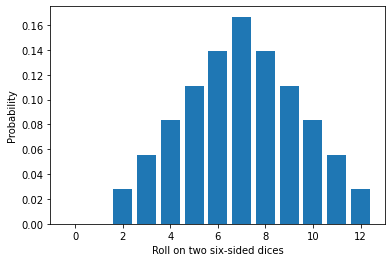

In [25]:
import numpy as np
import matplotlib.pyplot as plt

g = lambda x: np.sum([x**n/6 for n in range(1,7)])
G = lambda x: g(x)**2
G = np.vectorize(G)
N = 13

m = np.arange(N)
c = np.exp(2*np.pi*1j*m/N)
pn = abs(np.fft.fft(G(c))/N)
plt.bar(m,pn)
plt.ylabel('Probability')
plt.xlabel('Roll on two six-sided dices')
plt.show()

## General probability generating function